# Hospital Data Analysis

### Load and review the data

In [9]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
df = pd.read_csv("C:/Users/Hope/OneDrive/Desktop/Hospital_Data_Analysis/synthetic_hospital_performance.csv")

In [6]:
# Review first few rows
df.head()

,hospital_name,state,total_spending_per_beneficiary,readmission_rate,mortality_rate,patient_experience_score
0,Hospital 1,RI,10457.27,19.27,3.74,76.17
1,Hospital 2,NH,8852.89,18.39,3.49,61.30
2,Hospital 3,IA,14972.00,15.33,4.75,78.47
3,Hospital 4,TX,11896.73,20.23,3.19,76.93
4,Hospital 5,DE,12434.92,11.38,3.45,89.84


### Exploratory Data Analysis (EDA)

In [7]:
# Review dataset and check for missing values 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hospital_name                   1000 non-null   object 
 1   state                           1000 non-null   object 
 2   total_spending_per_beneficiary  1000 non-null   float64
 3   readmission_rate                1000 non-null   float64
 4   mortality_rate                  1000 non-null   float64
 5   patient_experience_score        1000 non-null   float64
dtypes: float64(4), object(2)
memory usage: 47.0+ KB


,total_spending_per_beneficiary,readmission_rate,mortality_rate,patient_experience_score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,12221.622820,15.078820,3.049990,77.601530
std,2576.405165,3.910365,1.142582,9.929491
min,7000.000000,5.000000,1.000000,50.000000
25%,10485.927500,12.317500,2.210000,70.792500
50%,12197.580000,15.165000,3.020000,77.670000
75%,13945.370000,17.795000,3.870000,84.727500
max,19918.430000,25.000000,6.220000,100.000000


In [11]:
# Hospitals per state
state_counts = df['state'].value_counts()

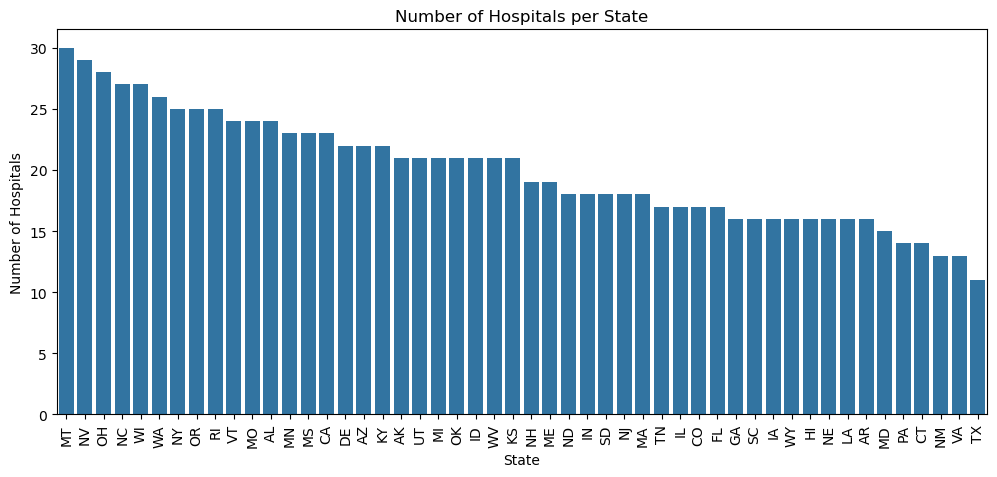

In [12]:
# Plot hospitals per state
plt.figure(figsize=(12,5))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.xticks(rotation=90)
plt.title("Number of Hospitals per State")
plt.ylabel("Number of Hospitals")
plt.xlabel("State")
plt.show()

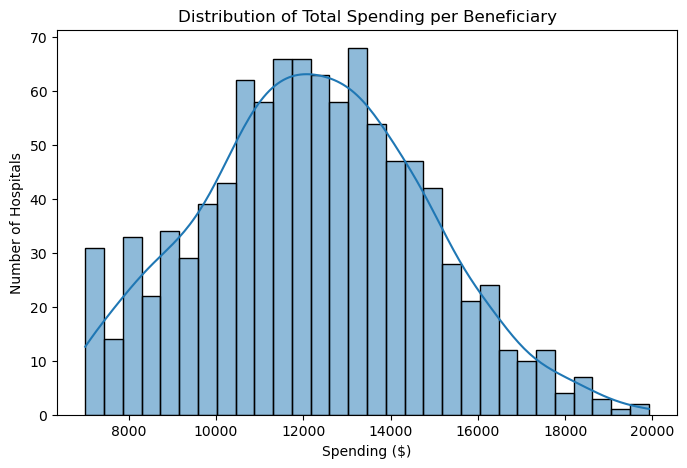

In [13]:
# Spending per beneficiary 
plt.figure(figsize=(8,5))
sns.histplot(df['total_spending_per_beneficiary'], bins=30, kde=True)
plt.title("Distribution of Total Spending per Beneficiary")
plt.xlabel("Spending ($)")
plt.ylabel("Number of Hospitals")
plt.show()

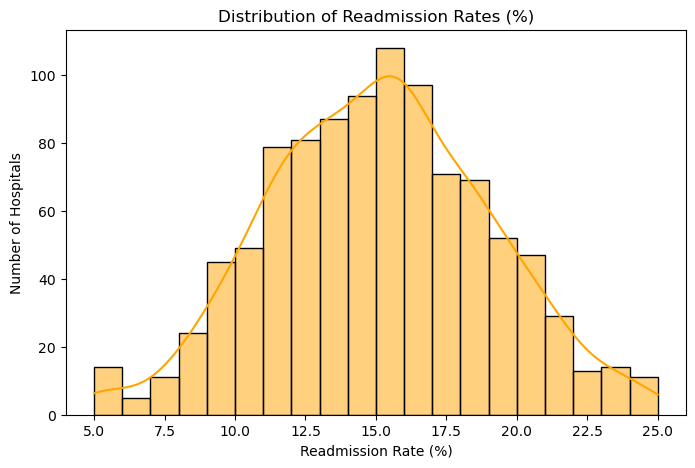

In [17]:
# Readmission rate
plt.figure(figsize=(8,5))
sns.histplot(df['readmission_rate'], bins=20, kde=True, color='orange')
plt.title("Distribution of Readmission Rates (%)")
plt.xlabel("Readmission Rate (%)")
plt.ylabel("Number of Hospitals")
plt.show()

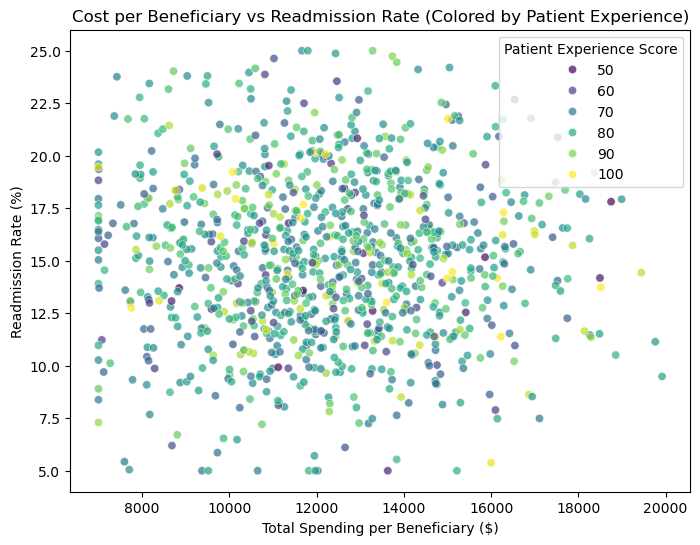

In [18]:
# Cost vs Readmission
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='total_spending_per_beneficiary',
    y='readmission_rate',
    hue='patient_experience_score',
    palette='viridis',
    alpha=0.7
)
plt.title("Cost per Beneficiary vs Readmission Rate (Colored by Patient Experience)")
plt.xlabel("Total Spending per Beneficiary ($)")
plt.ylabel("Readmission Rate (%)")
plt.legend(title='Patient Experience Score')
plt.show()

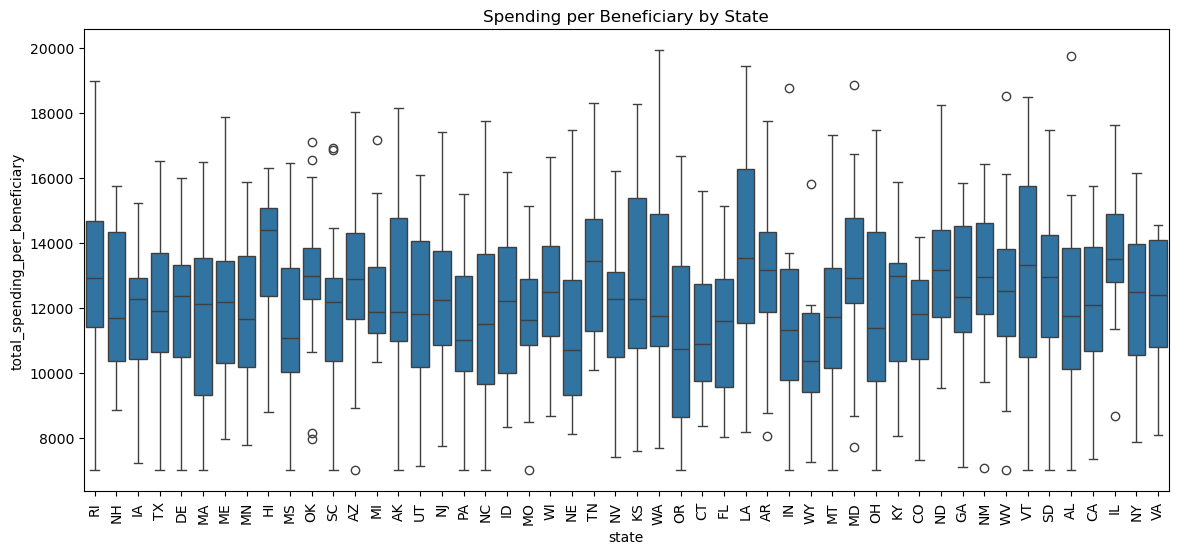

In [19]:
# Spending by state
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='state', y='total_spending_per_beneficiary')
plt.xticks(rotation=90)
plt.title("Spending per Beneficiary by State")
plt.show()

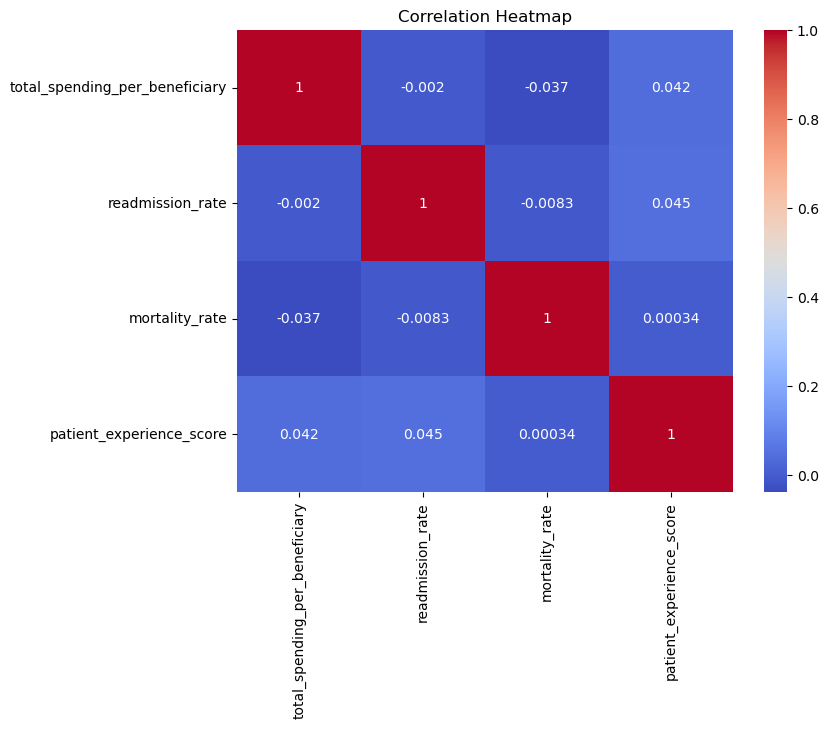

In [22]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Top & Bottom Hospital Performance

In [23]:
# Top 10 (lowest readmission rates)
top_readmission = df.sort_values('readmission_rate').head(10)

top_readmission[['hospital_name', 'state', 'readmission_rate', 
                 'mortality_rate', 'total_spending_per_beneficiary']]

,hospital_name,state,readmission_rate,mortality_rate,total_spending_per_beneficiary
998,Hospital 999,CO,5.00,1.72,9519.14
384,Hospital 385,MS,5.00,2.26,13631.34
805,Hospital 806,ME,5.00,3.49,9370.76
32,Hospital 33,NV,5.00,2.57,11820.81
265,Hospital 266,HI,5.00,1.00,15215.37
269,Hospital 270,MN,5.00,3.70,12028.37
742,Hospital 743,WY,5.00,3.24,11969.30
672,Hospital 673,OK,5.00,3.01,10649.19
935,Hospital 936,WA,5.05,2.91,7706.26
931,Hospital 932,DE,5.37,2.32,15997.81


In [24]:
# Bottom 10 (highest readmission rates)
bottom_readmission = df.sort_values('readmission_rate', ascending=False).head(10)

bottom_readmission[['hospital_name', 'state', 'readmission_rate', 
                    'mortality_rate', 'total_spending_per_beneficiary']]

,hospital_name,state,readmission_rate,mortality_rate,total_spending_per_beneficiary
319,Hospital 320,AR,25.00,3.99,11663.32
702,Hospital 703,UT,25.00,2.57,11799.35
438,Hospital 439,DE,25.00,3.27,13284.59
572,Hospital 573,OK,24.87,2.71,12434.77
747,Hospital 748,OK,24.74,2.99,13736.02
621,Hospital 622,OH,24.63,1.97,11021.44
271,Hospital 272,NJ,24.45,1.44,13836.13
779,Hospital 780,MT,24.20,4.32,15045.84
816,Hospital 817,WI,24.16,3.98,10593.50
267,Hospital 268,MO,24.11,2.42,14325.63


In [25]:
# Top 10 (lowest mortality rate)
best_mortality = df.sort_values('mortality_rate').head(10)
best_mortality[['hospital_name', 'state', 'mortality_rate', 'readmission_rate']]

,hospital_name,state,mortality_rate,readmission_rate
984,Hospital 985,ND,1.0,12.05
7,Hospital 8,ME,1.0,18.13
121,Hospital 122,ND,1.0,13.95
908,Hospital 909,CA,1.0,14.90
133,Hospital 134,AL,1.0,10.53
798,Hospital 799,PA,1.0,16.25
676,Hospital 677,UT,1.0,14.13
644,Hospital 645,GA,1.0,12.18
930,Hospital 931,AL,1.0,14.46
140,Hospital 141,CA,1.0,20.42


In [26]:
# Bottom 10 (highest mortality rate)
worst_mortality = df.sort_values('mortality_rate', ascending=False).head(10)
worst_mortality[['hospital_name', 'state', 'mortality_rate', 'readmission_rate']]

,hospital_name,state,mortality_rate,readmission_rate
787,Hospital 788,SD,6.22,17.16
241,Hospital 242,WV,6.08,15.96
395,Hospital 396,KY,6.04,13.04
328,Hospital 329,KY,5.98,11.66
679,Hospital 680,GA,5.92,20.27
610,Hospital 611,ME,5.91,19.11
528,Hospital 529,MD,5.80,15.74
966,Hospital 967,MI,5.77,18.42
329,Hospital 330,NC,5.72,14.59
933,Hospital 934,OH,5.71,12.23


In [27]:
# Top 10 (highest patient experience)
best_experience = df.sort_values('patient_experience_score', ascending=False).head(10)
best_experience[['hospital_name', 'state', 'patient_experience_score']]

,hospital_name,state,patient_experience_score
388,Hospital 389,MI,100.0
884,Hospital 885,HI,100.0
104,Hospital 105,DE,100.0
892,Hospital 893,NY,100.0
895,Hospital 896,NH,100.0
854,Hospital 855,ND,100.0
303,Hospital 304,MD,100.0
503,Hospital 504,OK,100.0
969,Hospital 970,MO,100.0
968,Hospital 969,UT,100.0


In [28]:
# Hospitals with high cost and high readmission rates
high_cost_high_readmission = df[
    (df['total_spending_per_beneficiary'] > df['total_spending_per_beneficiary'].median()) &
    (df['readmission_rate'] > df['readmission_rate'].median())
].sort_values(['readmission_rate', 'total_spending_per_beneficiary'], ascending=False)

high_cost_high_readmission.head(10)

,hospital_name,state,total_spending_per_beneficiary,readmission_rate,mortality_rate,patient_experience_score
438,Hospital 439,DE,13284.59,25.00,3.27,88.33
572,Hospital 573,OK,12434.77,24.87,2.71,76.67
747,Hospital 748,OK,13736.02,24.74,2.99,90.68
271,Hospital 272,NJ,13836.13,24.45,1.44,88.60
779,Hospital 780,MT,15045.84,24.20,4.32,76.31
267,Hospital 268,MO,14325.63,24.11,2.42,73.58
887,Hospital 888,AR,12464.42,23.55,3.27,57.80
440,Hospital 441,UT,16095.28,23.33,2.93,79.85
130,Hospital 131,MI,13179.22,23.08,3.68,83.05
613,Hospital 614,CT,12515.48,22.77,3.46,76.45


In [29]:
# Hospitals with low cost and low readmission rates
low_cost_low_readmission = df[
    (df['total_spending_per_beneficiary'] < df['total_spending_per_beneficiary'].median()) &
    (df['readmission_rate'] < df['readmission_rate'].median())
].sort_values(['readmission_rate', 'total_spending_per_beneficiary'])

low_cost_low_readmission.head(10)

,hospital_name,state,total_spending_per_beneficiary,readmission_rate,mortality_rate,patient_experience_score
805,Hospital 806,ME,9370.76,5.00,3.49,69.35
998,Hospital 999,CO,9519.14,5.00,1.72,79.35
672,Hospital 673,OK,10649.19,5.00,3.01,69.99
32,Hospital 33,NV,11820.81,5.00,2.57,82.42
742,Hospital 743,WY,11969.30,5.00,3.24,77.96
269,Hospital 270,MN,12028.37,5.00,3.70,72.46
935,Hospital 936,WA,7706.26,5.05,2.91,74.62
353,Hospital 354,OH,7595.34,5.43,1.95,69.26
994,Hospital 995,CO,11950.06,5.71,1.51,75.86
77,Hospital 78,NM,9727.11,5.86,3.43,68.97


### Identified Patterns

- Spending varies widely across hospitals, but higher spending does not consistently improve outcomes.

- Readmission and mortality rates tend to move together, suggesting shared drivers like care coordination or discharge planning.

- Hospitals with higher patient experience scores usually perform better clinically, indicating stronger internal processes.

- Performance differences are more tied to hospital-level practices than to state or region.

### Actionable Insights & Recommendations

- Focus on care coordination, especially during discharge, to reduce both readmissions and mortality.

- Invest in patient experience improvements (communication, follow-up, responsiveness), as they correlate with better outcomes.

- Review spending allocation to identify inefficiencies — more spending isn’t translating into better performance.

- Benchmark low-performing hospitals against high-performing ones to identify operational best practices.